# Logistic Regression
Logistic Regression is used for Classification ONLY

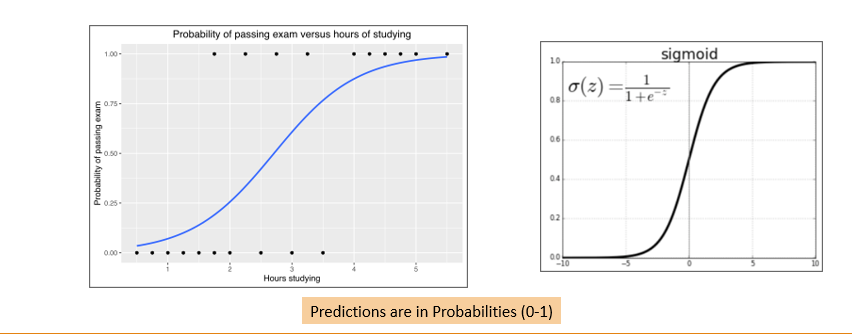

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Target - species

### Step 2 - Perform Basic Data Quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
# Drop the duplicate values
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

### Step 3 - Seperate X and Y(species)

In [8]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [11]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

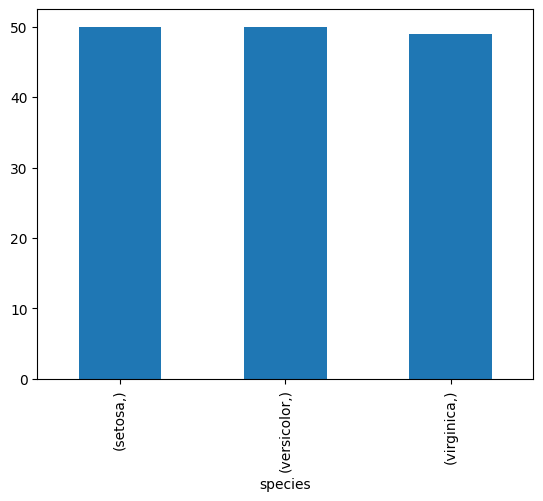

In [12]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply Preprocessing on X

In [13]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

### Because only numeric features are there in X , hence i will use only numerical pipeline here

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


### Step 5 - Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.275726,0.092598,0.653295,0.401770
49,-1.018798,0.552499,-1.333255,-1.308624
65,1.034197,0.092598,0.369502,0.270202
117,2.241842,1.702254,1.674949,1.322752
55,-0.173447,-0.597255,0.426261,0.138633


In [19]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [21]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [22]:
xtrain.shape

(99, 4)

In [23]:
xtest.shape

(50, 4)

### Step 6 - Model Building

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(xtrain, ytrain)

LogisticRegression()

In [25]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
model.intercept_

array([-0.19049869,  1.77556317, -1.58506448])

In [27]:
model.coef_

array([[-0.92044478,  1.21398442, -1.60769839, -1.59905047],
       [ 0.43056509, -0.4368165 , -0.21171527, -0.76576883],
       [ 0.48987968, -0.77716791,  1.81941365,  2.3648193 ]])

### Model evaluation

In [28]:
# Accuracy on train
model.score(xtrain, ytrain)

0.9797979797979798

In [29]:
# Accuracy on test
model.score(xtest, ytest)

0.92

In [30]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [31]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [32]:
yprob_test = model.predict_proba(xtest)
yprob_test[0:5]

array([[1.96403858e-02, 9.18185601e-01, 6.21740132e-02],
       [9.87792295e-01, 1.22066926e-02, 1.01197267e-06],
       [9.72732197e-01, 2.72669539e-02, 8.49229997e-07],
       [9.87013386e-01, 1.29858797e-02, 7.34113207e-07],
       [8.45726477e-02, 8.62059411e-01, 5.33679415e-02]])

In [33]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
yprob_test[0]

array([0.01964039, 0.9181856 , 0.06217401])